---
title: "Tumor Diagnosis (Part 1): Exploratory Data Analysis"
author: "Heiner Atze and [rhyme](https://www.coursera.org/programs/sorbonne-university-on-coursera-emxry/projects/exploratory-data-analysis-seaborn?source=search)"
date: 2024-07-28
abstract-title: ''
abstract: This notebook is the final result of a guided project on [Coursera](https://www.coursera.org/programs/sorbonne-university-on-coursera-emxry/projects/exploratory-data-analysis-seaborn?source=search).
format:
  html:
    css: seaborn_eda.css
---

<img id="title_image" width=100% src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">

### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Task 1: Loading Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In [101]:
plt.style.use('ggplot')
sns.set_style('white')
sns.set_context('talk')

In [6]:
df = pd.read_csv('data/data.csv').drop(['Unnamed: 32'], axis = 1)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [14]:
target = df['diagnosis']

In [9]:
features = df.drop(['id', 'diagnosis'], axis = 1)

### Task 3: Plot Diagnosis Distributions
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

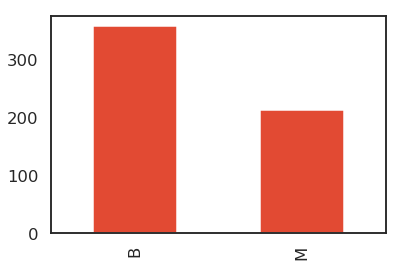

In [102]:
_ = target.value_counts().plot.bar()

In [96]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2 align=center> Data Visualization </h2>

---

### Task 4: Visualizing Standardized Data with Seaborn
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [98]:
features_std = features.subtract(features.mean()).div(features.std())
data = pd.concat([target, features_std], axis = 1)

In [99]:
data = pd.melt(data, id_vars = ['diagnosis'], var_name = 'features',
               value_name = 'value')

In [100]:
feature_names = data.features.unique()

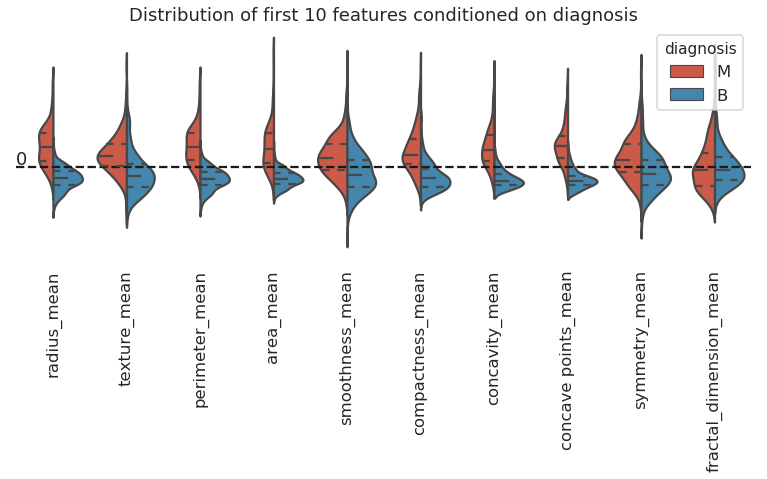

In [103]:
fig = plt.figure(figsize = (11,7))
ax = sns.violinplot(
    data = data.loc[data.features.isin(feature_names[:10])],
    x = 'features',
    y = 'value',
    hue = 'diagnosis', 
    split = True,
    inner = 'quart',
    figure = fig,
    zorder = 100
) 
ax.xaxis.set_tick_params(rotation = 90)
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.axhline(0, linestyle = '--', color = 'k', zorder = 1)
_ = ax.annotate(xy = (-0.5,0.1), s = "0")
_ = ax.set_title('Distribution of first 10 features conditioned on diagnosis')
fig.tight_layout()

### Task 5: Violin Plots and Box Plots

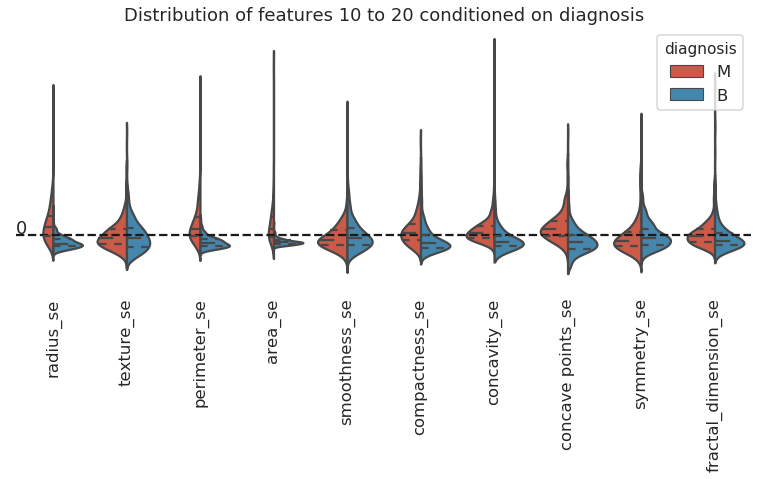

In [104]:
fig = plt.figure(figsize = (11,7))
ax = sns.violinplot(
    data = data.loc[data.features.isin(feature_names[10:20])],
    x = 'features',
    y = 'value',
    hue = 'diagnosis', 
    split = True,
    inner = 'quart',
    figure = fig,
    zorder = 100
) 
ax.xaxis.set_tick_params(rotation = 90)
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.axhline(0, linestyle = '--', color = 'k', zorder = 1)
_ = ax.annotate(xy = (-0.5,0.1), s = "0")
_ = ax.set_title('Distribution of features 10 to 20 conditioned on diagnosis')
fig.tight_layout()

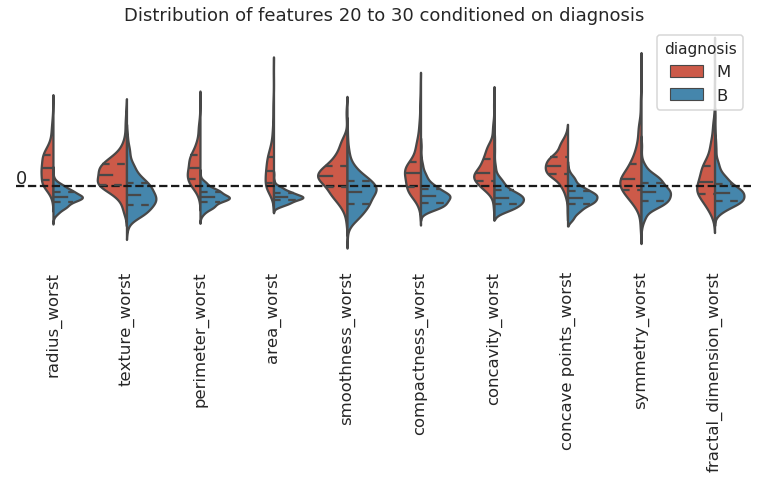

In [105]:
fig = plt.figure(figsize = (11,7))
ax = sns.violinplot(
    data = data.loc[data.features.isin(feature_names[20:30])],
    x = 'features',
    y = 'value',
    hue = 'diagnosis', 
    split = True,
    inner = 'quart',
    figure = fig,
    zorder = 100
) 
ax.xaxis.set_tick_params(rotation = 90)
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.axhline(0, linestyle = '--', color = 'k', zorder = 1)
_ = ax.annotate(xy = (-0.5,0.1), s = "0")
_ = ax.set_title('Distribution of features 20 to 30 conditioned on diagnosis')
fig.tight_layout()

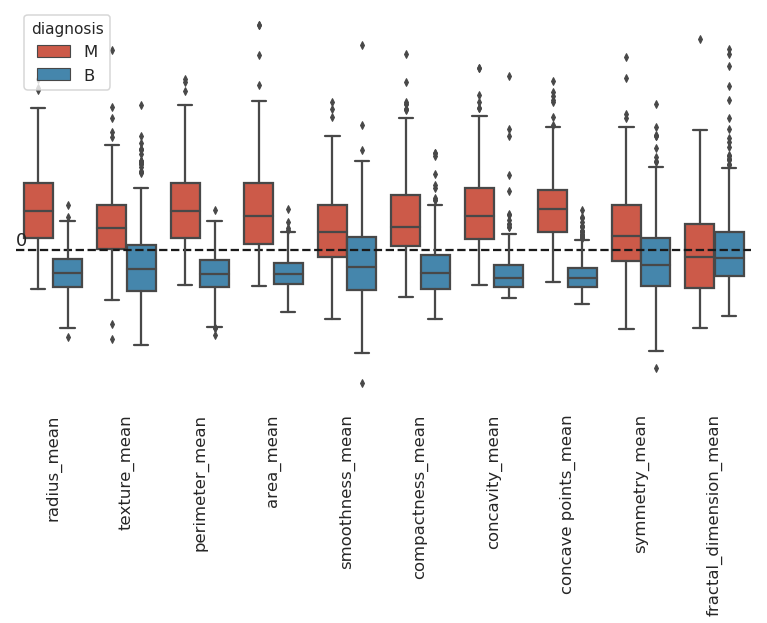

In [108]:
fig = plt.figure(figsize = (11,9))
ax = sns.boxplot(
    data = data.loc[data.features.isin(feature_names[:10])],
    x = 'features',
    y = 'value',
    hue = 'diagnosis',
) 
ax.xaxis.set_tick_params(rotation = 90)
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.axhline(0, linestyle = '--', color = 'k', zorder = 1)
_ = ax.annotate(xy = (-0.5,0.1), s = "0")
fig.tight_layout()

### Task 6: Using Joint Plots for Feature Comparison

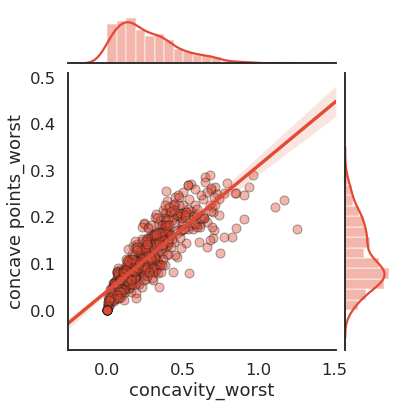

In [118]:
_ = sns.jointplot(
    features.loc[:, 'concavity_worst'],
    features.loc[:, 'concave points_worst'],
    kind = 'regg', scatter_kws = dict(alpha = 0.4, edgecolor = 'k')
)

### Task 7: Observing the Distribution of Values and their Variance with Swarm Plots

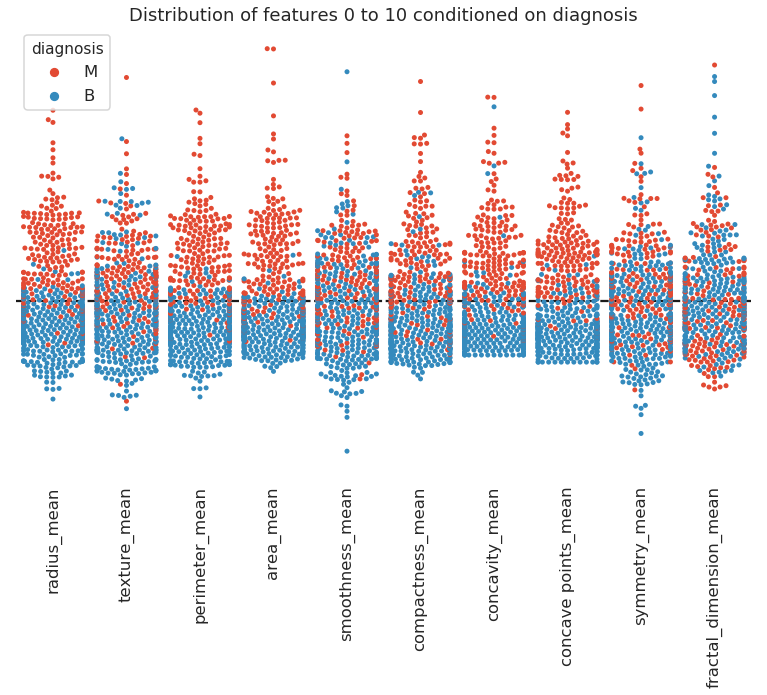

In [127]:
fig = plt.figure(figsize = (11,10))
ax = sns.swarmplot(
    data = data.loc[data.features.isin(feature_names[:10])],
    x = 'features',
    y = 'value',
    hue = 'diagnosis'
) 
ax.xaxis.set_tick_params(rotation = 90)
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.axhline(0, linestyle = '--', color = 'k', zorder = 1)
_ = ax.set_title('Distribution of features 0 to 10 conditioned on diagnosis')
fig.tight_layout()

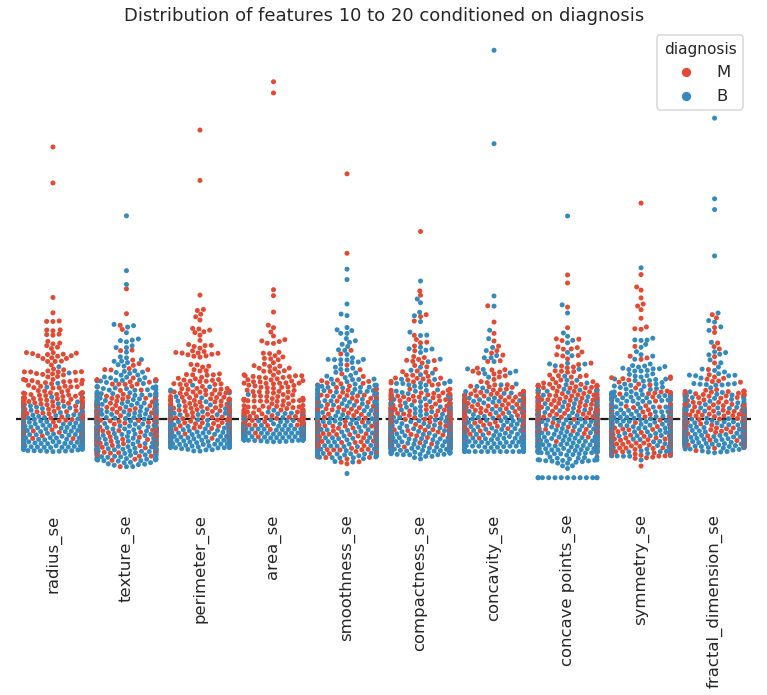

In [126]:
fig = plt.figure(figsize = (11,10))
ax = sns.swarmplot(
    data = data.loc[data.features.isin(feature_names[10:20])],
    x = 'features',
    y = 'value',
    hue = 'diagnosis'
) 
ax.xaxis.set_tick_params(rotation = 90)
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.axhline(0, linestyle = '--', color = 'k', zorder = 1)
_ = ax.set_title('Distribution of features 10 to 20 conditioned on diagnosis')
fig.tight_layout()

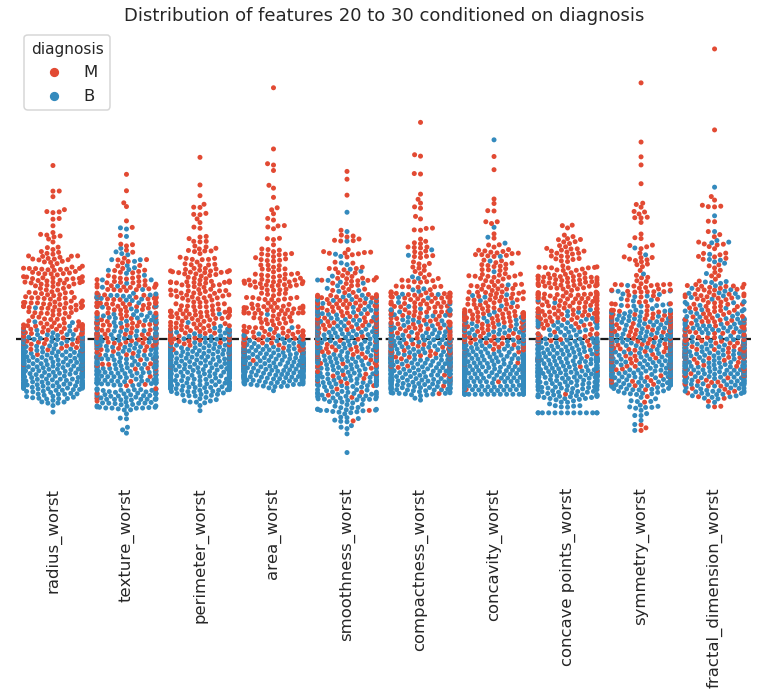

In [128]:
fig = plt.figure(figsize = (11,10))
ax = sns.swarmplot(
    data = data.loc[data.features.isin(feature_names[20:])],
    x = 'features',
    y = 'value',
    hue = 'diagnosis'
) 
ax.xaxis.set_tick_params(rotation = 90)
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.axhline(0, linestyle = '--', color = 'k', zorder = 1)
_ = ax.set_title('Distribution of features 20 to 30 conditioned on diagnosis')
fig.tight_layout()

### Task 8: Observing all Pair-wise Correlations

In [129]:
corr = features.corr()

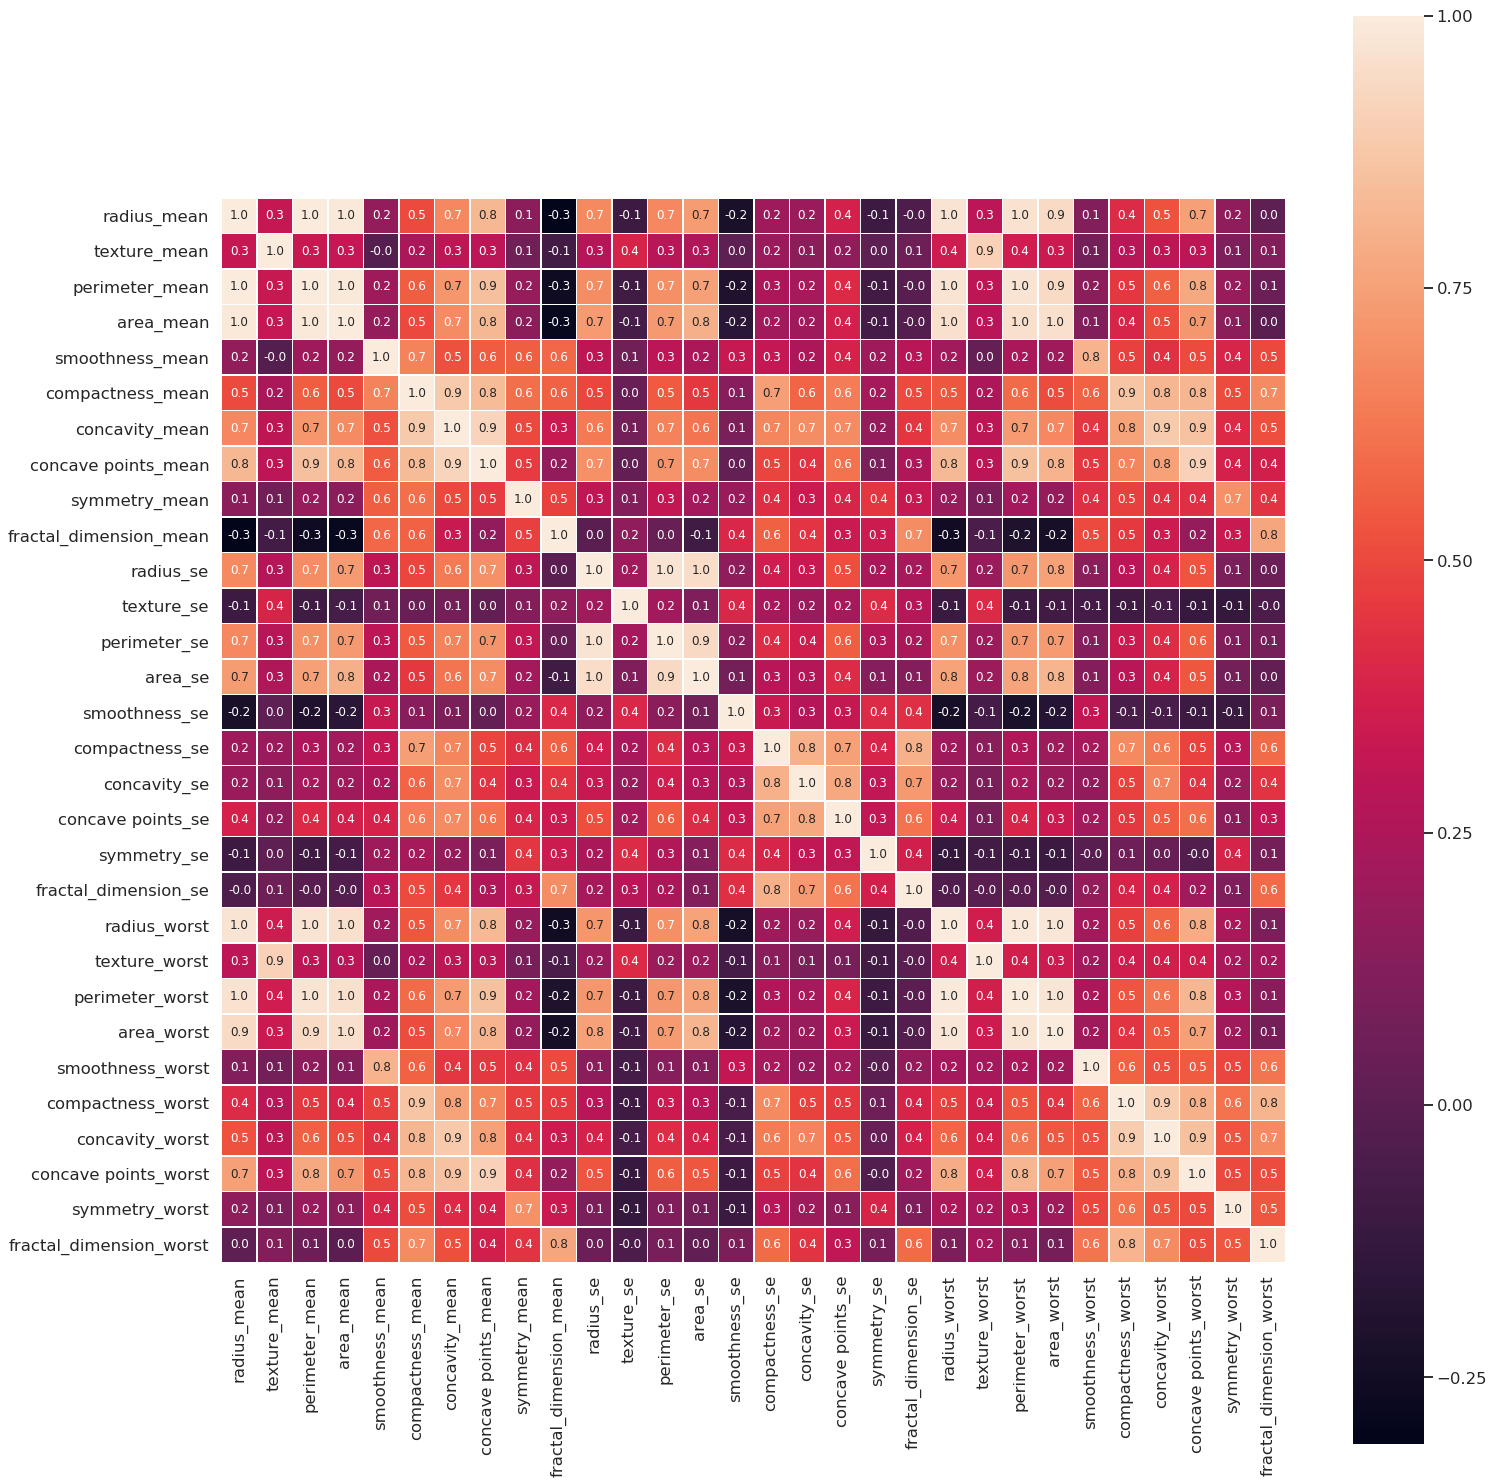

In [147]:
fig = plt.figure(figsize = (22,22))
ax = sns.heatmap(corr, square = True,
                 annot = True, annot_kws = dict(fontsize = 12),
                 linewidth = .5, fmt = '.1f')
fig.tight_layout()